# Employee Salary Prediction

In [4]:
# importing library
import pandas as pd

In [5]:
# Load the dataset
df = pd.read_csv(r"C:\Users\DELL\Documents\AICTE B2_AI internship\employee salary prediction_dataset.csv")
df.head(10)

,age,gender,education_level,job_title,years_of_experience,salary,native_country,relationship
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,United-States,Own-child
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,United-States,Husband
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,United-States,Husband
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,United-States,Husband
4,52.0,Male,Master's,Director,20.0,200000.0,United-States,Own-child
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0,United-States,Not-in-family
6,42.0,Female,Master's,Product Manager,12.0,120000.0,United-States,Unmarried
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0,United-States,Husband
8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0,United-States,Unmarried
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0,United-States,Husband


In [6]:
df.tail(3)

,age,gender,education_level,job_title,years_of_experience,salary,native_country,relationship
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,United-States,Husband
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,United-States,Own-child
6703,26.0,Female,High School,Sales Executive,1.0,35000.0,United-States,Husband


In [7]:
df.shape

(6704, 8)

In [8]:
#null values
df.isna().sum() #mean mdeian mode arbitrary

age                    2
gender                 2
education_level        3
job_title              2
years_of_experience    3
salary                 5
native_country         0
relationship           0
dtype: int64

In [9]:
print(df.job_title.value_counts())

job_title
Software Engineer                 518
Data Scientist                    453
Software Engineer Manager         376
Data Analyst                      363
Senior Project Engineer           318
                                 ... 
Junior Social Media Specialist      1
Senior Software Architect           1
Developer                           1
Social M                            1
Social Media Man                    1
Name: count, Length: 193, dtype: int64


In [10]:
df.job_title.replace({'?':'Others'},inplace=True)
print(df['job_title'].value_counts())

job_title
Software Engineer                 518
Data Scientist                    453
Software Engineer Manager         376
Data Analyst                      363
Senior Project Engineer           318
                                 ... 
Junior Social Media Specialist      1
Senior Software Architect           1
Developer                           1
Social M                            1
Social Media Man                    1
Name: count, Length: 193, dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_11872\446276873.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.job_title.replace({'?':'Others'},inplace=True)


In [11]:
# Dataset Shape and Data Types
print(" Dataset Shape:", df.shape)
print("\n Column Data Types:\n", df.dtypes)

 Dataset Shape: (6704, 8)

 Column Data Types:
 age                    float64
gender                  object
education_level         object
job_title               object
years_of_experience    float64
salary                 float64
native_country          object
relationship            object
dtype: object


In [12]:
print(df.relationship.value_counts())

relationship
Husband           2639
Not-in-family     1751
Own-child         1054
Unmarried          734
Wife               302
Other-relative     224
Name: count, dtype: int64


In [13]:
print(df.gender.value_counts())

gender
Male      3674
Female    3014
Other       14
Name: count, dtype: int64


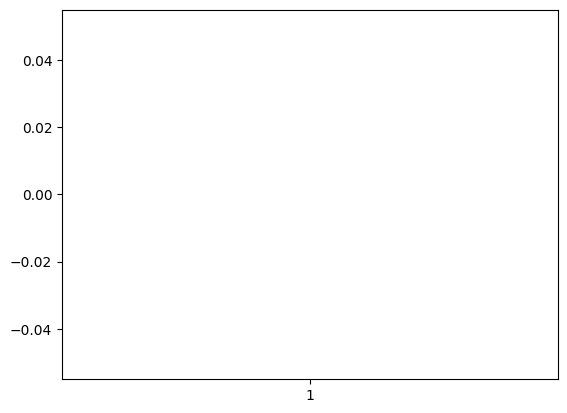

In [14]:
#outlier detection
import matplotlib.pyplot as plt   #visualization
plt.boxplot(df['age'])
plt.show()

In [15]:
df=df[(df['age']<=75)&(df['age']>=17)]

In [16]:
# Create a new column 'salary_category' based on salary range
def categorize_salary(salary):
    if salary < 50000:
        return 'low'
    elif salary < 80000:
        return 'medium'
    else:
        return 'high'

df['salary_category'] = df['salary'].apply(categorize_salary)

In [17]:
# Check distribution
print(df['salary_category'].value_counts())


salary_category
high      4669
medium    1347
low        686
Name: count, dtype: int64


In [18]:
df.head(10)

,age,gender,education_level,job_title,years_of_experience,salary,native_country,relationship,salary_category
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,United-States,Own-child,high
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,United-States,Husband,medium
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,United-States,Husband,high
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,United-States,Husband,medium
4,52.0,Male,Master's,Director,20.0,200000.0,United-States,Own-child,high
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0,United-States,Not-in-family,medium
6,42.0,Female,Master's,Product Manager,12.0,120000.0,United-States,Unmarried,high
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0,United-States,Husband,high
8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0,United-States,Unmarried,low
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0,United-States,Husband,high


In [19]:
# Categorize salaries into clear, non-overlapping groups
def categorize_salary(salary):
    if salary < 50000:
        return '<60000'
    else:
        return '>=60000'

# Apply the function to create a new column
df['salary_category'] = df['salary'].apply(categorize_salary)


In [20]:
# Check the category distribution
print(df['salary_category'].value_counts())


salary_category
>=60000    6016
<60000      686
Name: count, dtype: int64


In [21]:
df.head(10)

,age,gender,education_level,job_title,years_of_experience,salary,native_country,relationship,salary_category
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,United-States,Own-child,>=60000
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,United-States,Husband,>=60000
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,United-States,Husband,>=60000
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,United-States,Husband,>=60000
4,52.0,Male,Master's,Director,20.0,200000.0,United-States,Own-child,>=60000
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0,United-States,Not-in-family,>=60000
6,42.0,Female,Master's,Product Manager,12.0,120000.0,United-States,Unmarried,>=60000
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0,United-States,Husband,>=60000
8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0,United-States,Unmarried,<60000
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0,United-States,Husband,>=60000


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\DELL\AppData\Local\Temp\ipykernel_11872\1715735131.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='salary', data=df, palette='Set2')
C:\Users\DELL\AppData\Local\Temp\ipykernel_11872\1715735131.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='salary', data=df, palette='Set2')
C:\Users\DELL\AppData\Local\Temp\ipykernel_11872\1715735131.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='salary', data=df, palette='Set2')
C:\Users\DELL\AppData\Local\Temp\ipykernel_11872\1715735131.py:10: FutureWar

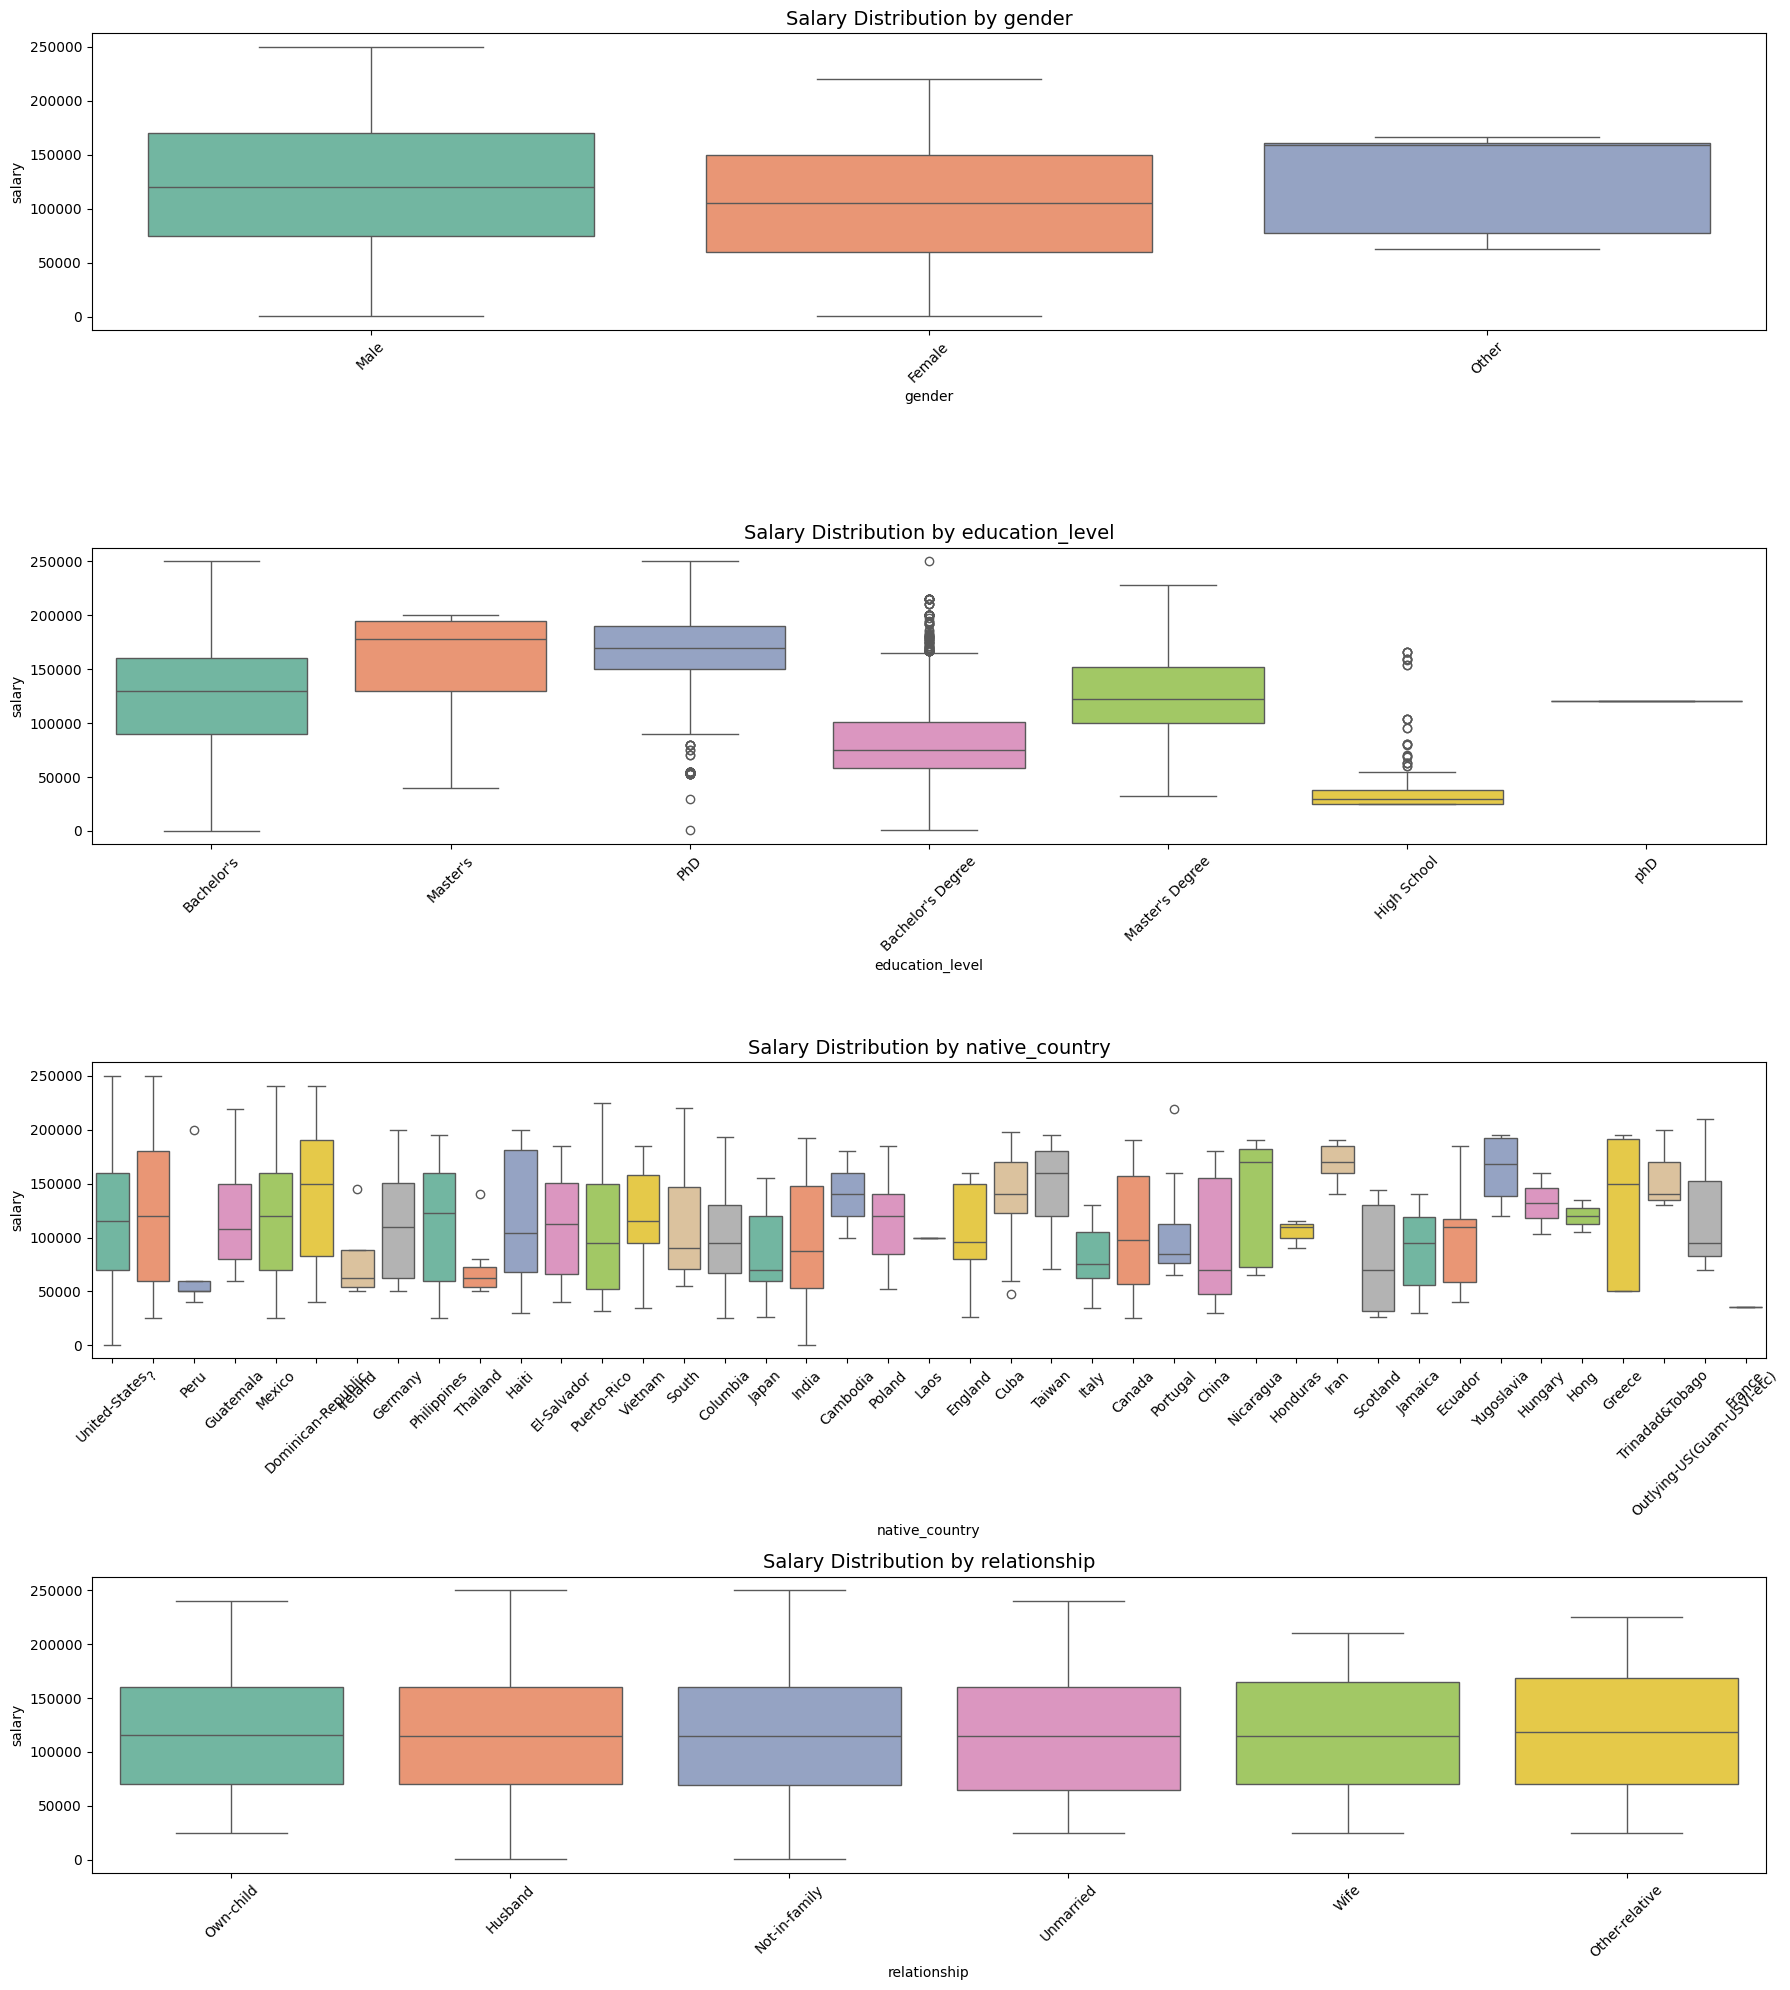

In [23]:
# List of categorical features to analyze against salary
categorical_features = ['gender', 'education_level',  'native_country', 'relationship']

# Set figure size for multiple subplots
plt.figure(figsize=(18, 5 * len(categorical_features)))

# Loop through each categorical feature to plot boxplots
for i, col in enumerate(categorical_features):
    plt.subplot(len(categorical_features), 1, i + 1)
    sns.boxplot(x=col, y='salary', data=df, palette='Set2')
    plt.title(f'Salary Distribution by {col}', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_11872\2263171674.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')
C:\Users\DELL\AppData\Local\Temp\ipykernel_11872\2263171674.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')
C:\Users\DELL\AppData\Local\Temp\ipykernel_11872\2263171674.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')
C:\Users\DELL\AppData\Local\Temp\ipykernel_11872\2263171674.py:8: FutureWarning: 

Passing `palette` wi

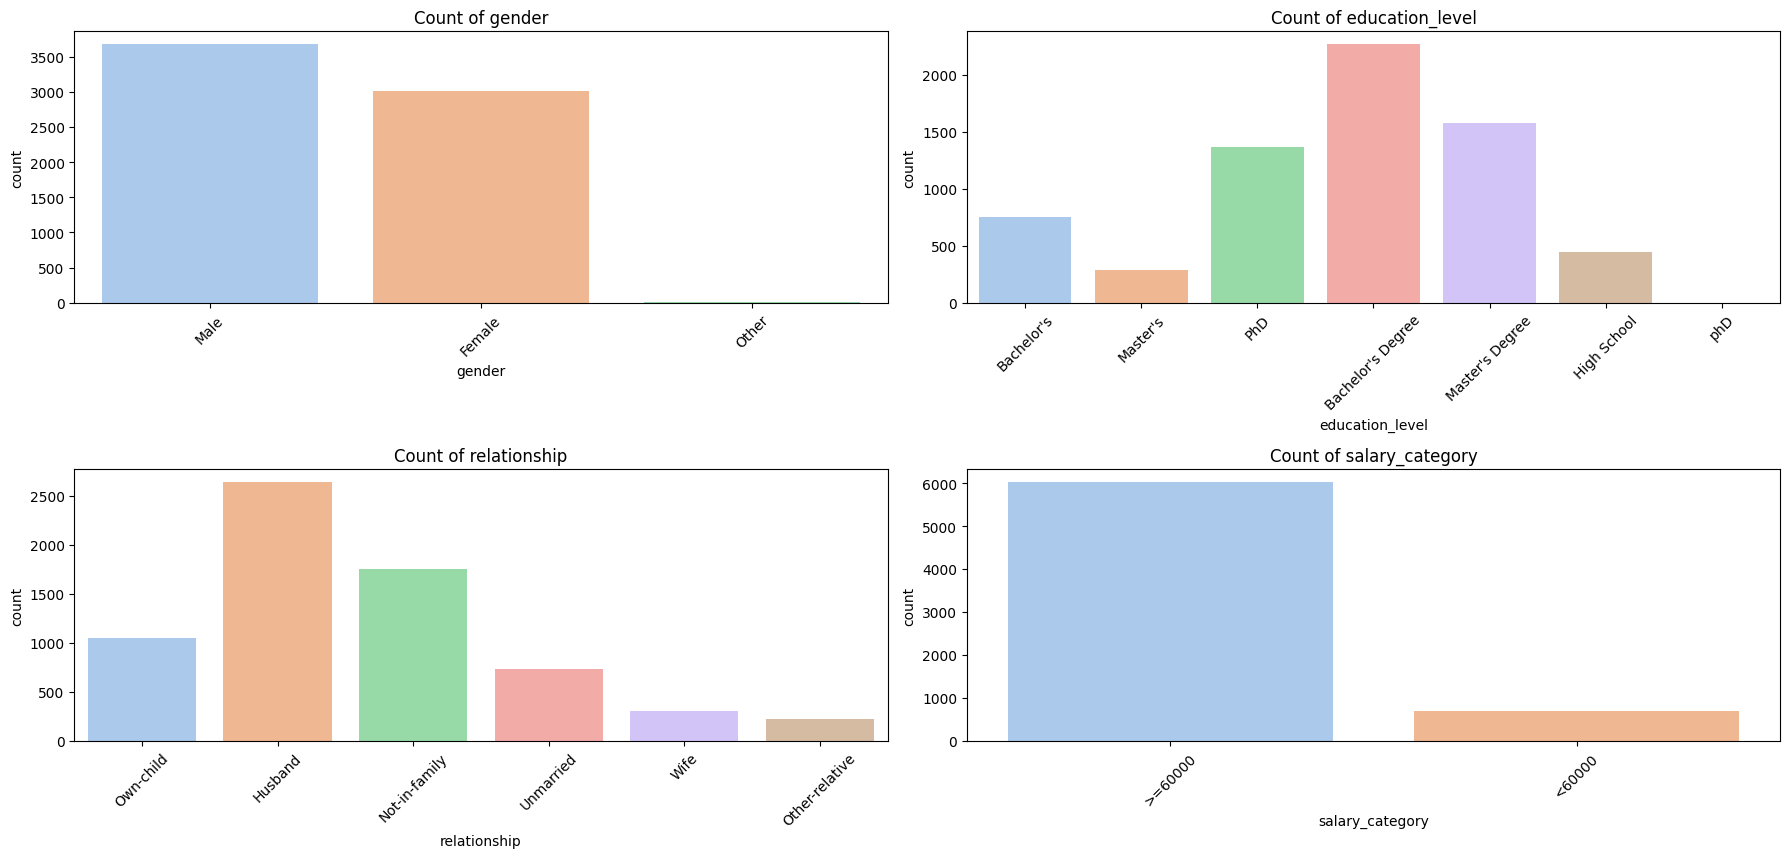

In [24]:
# Count plots for each categorical column
categorical_cols = ['gender', 'education_level',  'relationship', 'salary_category']

plt.figure(figsize=(18, 12))

for i, col in enumerate(categorical_cols):
    plt.subplot(3, 2, i + 1)
    sns.countplot(data=df, x=col, palette='pastel')
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

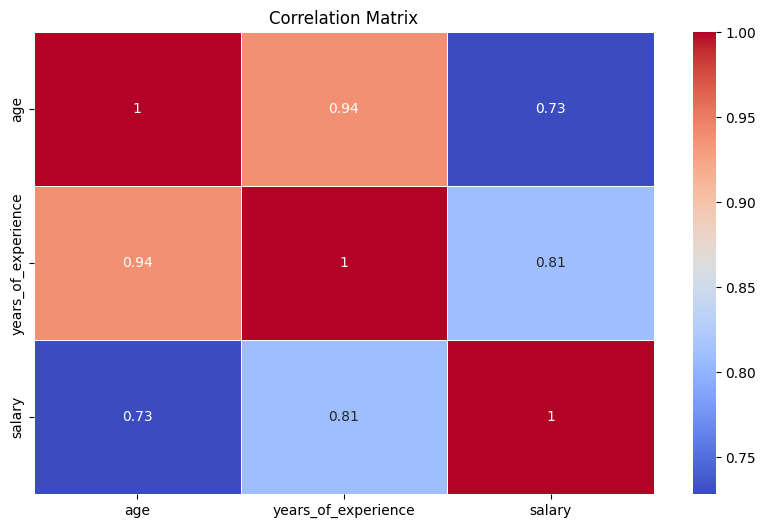

In [25]:
# Correlation heatmap for numeric features
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [26]:
# Summary of numerical features
df.describe()


,age,years_of_experience,salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


C:\Users\DELL\AppData\Local\Temp\ipykernel_11872\3681009564.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='education_level', y='salary', data=df, palette='Set2')


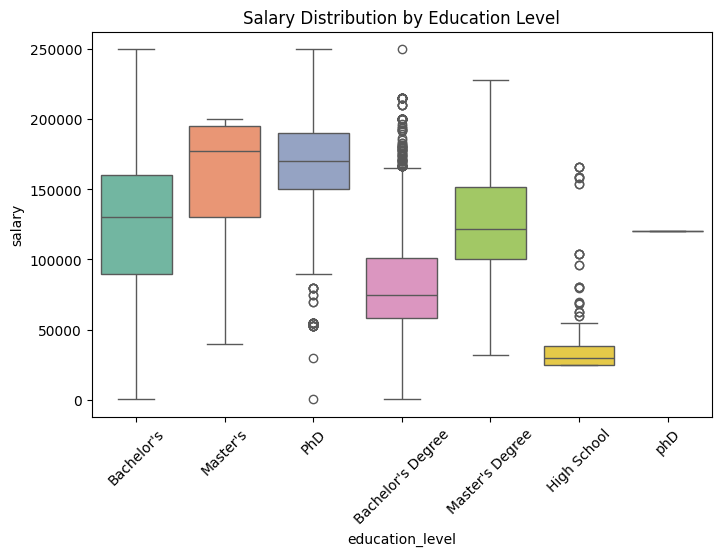

In [27]:
# Check how education level influences employee salary
plt.figure(figsize=(8, 5))
sns.boxplot(x='education_level', y='salary', data=df, palette='Set2')
plt.title('Salary Distribution by Education Level')
plt.xticks(rotation=45)
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_11872\1124753407.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='job_title', y='salary', data=df[df['job_title'].isin(top_jobs)], palette='Set3')


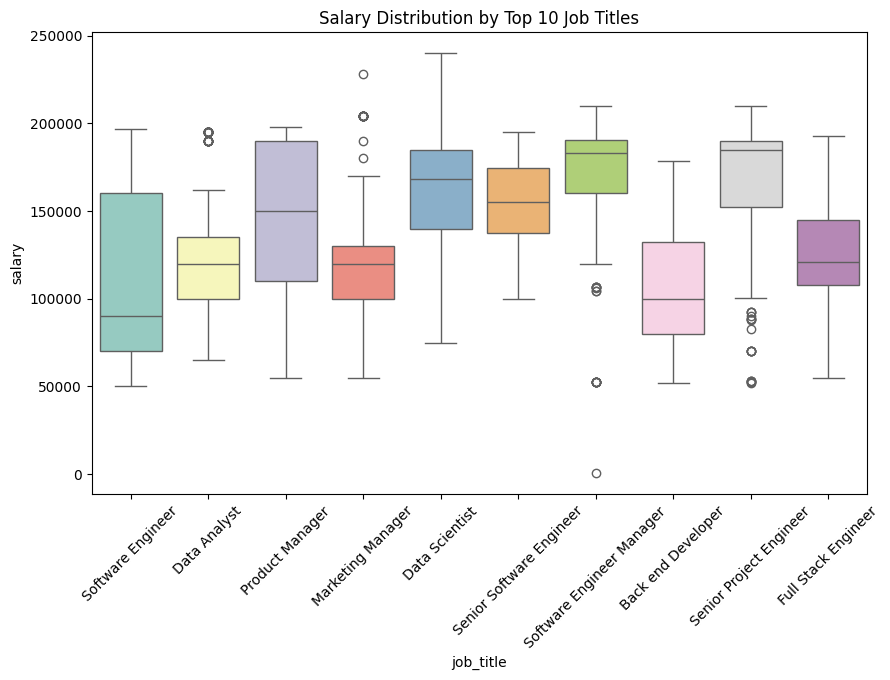

In [28]:
# Get top 10 job titles
top_jobs = df['job_title'].value_counts().head(10).index
plt.figure(figsize=(10, 6))
sns.boxplot(x='job_title', y='salary', data=df[df['job_title'].isin(top_jobs)], palette='Set3')
plt.title('Salary Distribution by Top 10 Job Titles')
plt.xticks(rotation=45)
plt.show()


In [29]:
# we convert categories into numbers while preserving label info
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
categorical_cols = ['gender', 'education_level', 'job_title', 'native_country', 'relationship']

# Apply Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store for future decoding (optional)


In [30]:
df

,age,gender,education_level,job_title,years_of_experience,salary,native_country,relationship,salary_category
0,32.0,1,0,177,5.0,90000.0,38,3,>=60000
1,28.0,0,3,18,3.0,65000.0,38,0,>=60000
2,45.0,1,5,145,15.0,150000.0,38,0,>=60000
3,36.0,0,0,116,7.0,60000.0,38,0,>=60000
4,52.0,1,3,26,20.0,200000.0,38,3,>=60000
...,...,...,...,...,...,...,...,...,...
6699,49.0,0,5,34,20.0,200000.0,38,3,>=60000
6700,32.0,1,2,116,3.0,50000.0,38,1,>=60000
6701,30.0,0,1,42,4.0,55000.0,38,0,>=60000
6702,46.0,1,4,97,14.0,140000.0,38,3,>=60000


In [31]:
#Binary classification models
df['target'] = df['salary_category'].apply(lambda x: 1 if x == '>=60000' else 0)

In [32]:
df

,age,gender,education_level,job_title,years_of_experience,salary,native_country,relationship,salary_category,target
0,32.0,1,0,177,5.0,90000.0,38,3,>=60000,1
1,28.0,0,3,18,3.0,65000.0,38,0,>=60000,1
2,45.0,1,5,145,15.0,150000.0,38,0,>=60000,1
3,36.0,0,0,116,7.0,60000.0,38,0,>=60000,1
4,52.0,1,3,26,20.0,200000.0,38,3,>=60000,1
...,...,...,...,...,...,...,...,...,...,...
6699,49.0,0,5,34,20.0,200000.0,38,3,>=60000,1
6700,32.0,1,2,116,3.0,50000.0,38,1,>=60000,1
6701,30.0,0,1,42,4.0,55000.0,38,0,>=60000,1
6702,46.0,1,4,97,14.0,140000.0,38,3,>=60000,1


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_cols = ['age', 'years_of_experience', 'salary']
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])


In [34]:
# Drop original category and unnecessary columns if needed
X = df.drop(columns=['salary_category', 'target'])  # input features
y = df['target']  # target variable


In [35]:
# Drop rows with any NaN values from features and target
X = X.dropna()
y = y[X.index]  # Align target variable to dropped X

In [36]:
df

,age,gender,education_level,job_title,years_of_experience,salary,native_country,relationship,salary_category,target
0,-0.212877,1,0,177,-0.510797,-0.479839,38,3,>=60000,1
1,-0.738221,0,3,18,-0.840909,-0.953483,38,0,>=60000,1
2,1.494490,1,5,145,1.139763,0.656907,38,0,>=60000,1
3,0.312467,0,0,116,-0.180685,-1.048212,38,0,>=60000,1
4,2.413841,1,3,26,1.965043,1.604195,38,3,>=60000,1
...,...,...,...,...,...,...,...,...,...,...
6699,2.019833,0,5,34,1.965043,1.604195,38,3,>=60000,1
6700,-0.212877,1,2,116,-0.840909,-1.237669,38,1,>=60000,1
6701,-0.475549,0,1,42,-0.675853,-1.142941,38,0,>=60000,1
6702,1.625826,1,4,97,0.974707,0.467450,38,3,>=60000,1


C:\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


🔍 Logistic Regression Accuracy: 0.9783582089552239
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       152
           1       0.99      0.99      0.99      1188

    accuracy                           0.98      1340
   macro avg       0.95      0.94      0.95      1340
weighted avg       0.98      0.98      0.98      1340


🌲 Random Forest Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       152
           1       1.00      1.00      1.00      1188

    accuracy                           1.00      1340
   macro avg       1.00      1.00      1.00      1340
weighted avg       1.00      1.00      1.00      1340



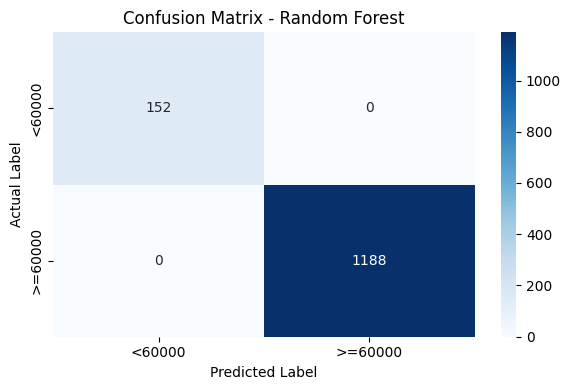

In [37]:
# ===============================
#  Model Building
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ===============================
# 🔁  Train-Test Split
# ===============================
# Ensure X and y are already defined in Step 3
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# ===============================
#  Logistic Regression Model
# ===============================
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# ===============================
#  Random Forest Classifier
# ===============================
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# ===============================
# 🔍 Step 4d: Predictions
# ===============================
log_preds = log_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# ===============================
# 📊  Model Evaluation
# ===============================
print("🔍 Logistic Regression Accuracy:", accuracy_score(y_test, log_preds))
print("Classification Report:\n", classification_report(y_test, log_preds))

print("\n🌲 Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("Classification Report:\n", classification_report(y_test, rf_preds))

# ===============================
# 🧩  Confusion Matrix (Random Forest)
# ===============================
cm_rf = confusion_matrix(y_test, rf_preds)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['<60000', '>=60000'],
            yticklabels=['<60000', '>=60000'])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.show()


In [38]:
# ============================ Step 5: Model Comparison =============================
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# 1. Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Define models to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# 3. Evaluate models using pipeline
results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),   # handle NaNs
        ('scaler', StandardScaler()),                  # scale features
        ('classifier', model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\n🔍 Model: {name}")
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))



🔍 Model: Logistic Regression
Accuracy: 0.9925
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.97       152
           1       0.99      1.00      1.00      1188

    accuracy                           0.99      1340
   macro avg       1.00      0.97      0.98      1340
weighted avg       0.99      0.99      0.99      1340


🔍 Model: Random Forest
Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       152
           1       1.00      1.00      1.00      1188

    accuracy                           1.00      1340
   macro avg       1.00      1.00      1.00      1340
weighted avg       1.00      1.00      1.00      1340


🔍 Model: K-Nearest Neighbors
Accuracy: 0.9799
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.87      0.91       152
           1       0.98      0

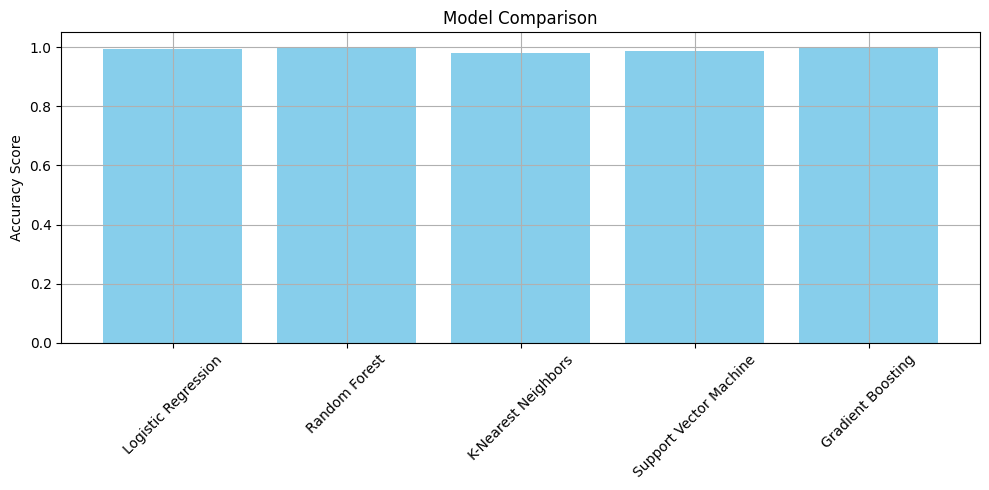

In [39]:
# 📊 Visual comparison of model performance
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import joblib

# ---------------------------
# 🎯 Define Features and Target
# ---------------------------
# Assume df is your cleaned dataframe and 'salary_category' is the target
x = df.drop('salary_category', axis=1)
y = df['salary_category']

# ---------------------------
# 🧼 Handle Missing Values
# ---------------------------
# For numeric features
x = x.fillna(x.mean(numeric_only=True))

# If categorical columns exist, you can one-hot encode them
x = pd.get_dummies(x, drop_first=True)

# ---------------------------
# 🧪 Train-Test Split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# ---------------------------
# 🤖 Define and Train Models
# ---------------------------
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

print("🔍 Model Evaluation:\n")
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"✅ {name}: {acc:.4f}")
    print(classification_report(y_test, preds))
    print("-" * 60)

# ---------------------------
# 🏆 Get and Save Best Model
# ---------------------------
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n🏆 Best Model: {best_model_name} with accuracy {results[best_model_name]:.4f}")

# Save model
joblib.dump(best_model, "best_model.pkl")
print("💾 Best model saved as best_model.pkl")


🔍 Model Evaluation:

✅ LogisticRegression: 1.0000
              precision    recall  f1-score   support

      <60000       1.00      1.00      1.00       121
     >=60000       1.00      1.00      1.00      1220

    accuracy                           1.00      1341
   macro avg       1.00      1.00      1.00      1341
weighted avg       1.00      1.00      1.00      1341

------------------------------------------------------------
✅ RandomForest: 1.0000
              precision    recall  f1-score   support

      <60000       1.00      1.00      1.00       121
     >=60000       1.00      1.00      1.00      1220

    accuracy                           1.00      1341
   macro avg       1.00      1.00      1.00      1341
weighted avg       1.00      1.00      1.00      1341

------------------------------------------------------------
✅ KNN: 0.9746
              precision    recall  f1-score   support

      <60000       0.91      0.80      0.85       121
     >=60000       0.98     

C:\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


✅ GradientBoosting: 1.0000
              precision    recall  f1-score   support

      <60000       1.00      1.00      1.00       121
     >=60000       1.00      1.00      1.00      1220

    accuracy                           1.00      1341
   macro avg       1.00      1.00      1.00      1341
weighted avg       1.00      1.00      1.00      1341

------------------------------------------------------------

🏆 Best Model: LogisticRegression with accuracy 1.0000
💾 Best model saved as best_model.pkl


In [41]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load trained model
model = joblib.load("best_model.pkl")

# App configuration
st.set_page_config(page_title="Salary Predictor", layout="centered")
st.title("💰 Salary Prediction App")
st.markdown("Predict whether an employee earns **<60,000** or **≥60,000**.")

# Sidebar inputs (match trained model features)
st.sidebar.header("Enter Employee Info")

education_level = st.sidebar.slider("Education Level (0 = Low, 5 = High)", 0, 5, 2)
experience_years = st.sidebar.slider("Years of Experience", 0, 40, 5)
job_role_encoded = st.sidebar.slider("Job Role (Encoded)", 0, 10, 3)
city_encoded = st.sidebar.slider("City (Encoded)", 0, 5, 2)
gender = st.sidebar.radio("Gender", ["Male", "Female"])
gender_encoded = 1 if gender == "Male" else 0

# Create input DataFrame
input_df = pd.DataFrame({
    "education_level": [education_level],
    "experience_years": [experience_years],
    "job_role_encoded": [job_role_encoded],
    "city_encoded": [city_encoded],
    "gender_encoded": [gender_encoded]
})

# Show input
st.write("### 🧾 Input Summary")
st.dataframe(input_df)

# Predict button
if st.button("🔍 Predict Salary Class"):
    prediction = model.predict(input_df)[0]
    result = "≥60,000" if prediction == 1 else "<60,000"
    st.success(f"✅ Predicted Salary: **{result}**")

Writing app.py


In [49]:
!streamlit run app.py

'streamlit' is not recognized as an internal or external command,
operable program or batch file.


In [50]:
# 📤 Export all plots
plt.savefig("model_accuracy_comparison.png")      # 📊 Model Comparison Bar Chart
plt.savefig("correlation_heatmap.png")            # 🔥 Correlation Matrix
plt.savefig("age_distribution.png")               # 🎂 Age Distribution
plt.savefig("hours_per_week_distribution.png")    # ⏱️ Work Hours Distribution
plt.savefig("education_vs_salary.png")            # 🎓 Education vs Salary
plt.savefig("occupation_vs_salary.png")           # 💼 Occupation vs Salary

# 📤 Export result comparison table
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
results_df.to_csv("model_comparison.csv", index=False)

# 📤 Export processed features and labels
X.to_csv("X_processed.csv", index=False)
y.to_csv("y_labels.csv", index=False)

# 📤 Export final processed DataFrame
df.to_csv("processed_employee_data.csv", index=False)

print("✅ All key exports completed successfully.")


✅ All key exports completed successfully.


<Figure size 640x480 with 0 Axes>